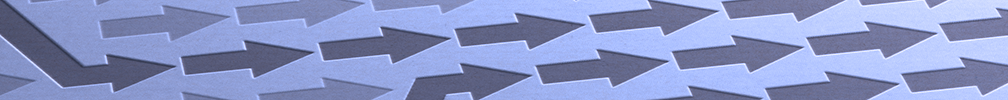
# Week 2 Overview
Suppose in your next position you are hired as the data scientist for the business development team of a real estate developer, and they are hoping to expand into a new market. How can you make reliable predictions about housing prices? How can you ensure the results you present to the team will be explainable? In this module, we’ll dive into one of the most foundational machine learning models: **linear regression**. Whether it’s forecasting trends or uncovering hidden relationships, this model forms the backbone of many real-world applications and is the perfect way to start our exploration of ML models. 

Last week, we explored the core principles of machine learning, distinguishing between **supervised** and **unsupervised learning** while examining the balance between objectives such as **prediction and inference**. We introduced important evaluation concepts, including the **Bias-Variance Tradeoff** and their role in evaluating model performance. In the next few weeks, we will apply these ideas to regression.

We’ll begin this week with the simplest case: linear regression with scalar $X$ and $Y$, where models are represented as lines on a scatter plot. After introducing key definitions and the assumptions underlying the model and demonstrating it on some simple 2D data sets, we’ll discuss its limitations and evaluate its performance using the Mean Squared Error (MSE) metric. You’ll explore two distinct approaches for finding the optimal solution: the explicit formulae and an iterative approximation method called “gradient descent.” Then, we’ll cover multiple regression for higher-dimensional data and remove the linearity assumption with polynomial regression, providing tools to model more complex relationships. By the end of this week, you’ll have a solid understanding of how to apply and evaluate regression models in various contexts.

## Key Terms
- **Linear Regression**: A model that fits a straight line through data to predict a dependent variable based on one or more independent variables
- **Multiple Regression**: An extension of linear regression that fits a hyperplane (the generalization of a line) to model the relationship between a dependent variable and multiple independent variables
- **Polynomial Regression**: A regression technique that fits a non-linear relationship by modeling the data with a polynomial equation
- **Gradient Descent:** An algorithm that iteratively adjusts model parameters to minimize prediction error
- **Mean Square Error (MSE):** A metric that measures the average squared difference between actual and predicted values
- **Root Mean Square Error:** The square root of the MSE, which uses the original units of $Y$ 
- **Coefficient of Determination or $R^2$**: A measure of how much of the variance of $Y$ is captured by the regression model 
- **Assumptions of Linear Regression:** Includes linearity, independence of errors, normality with mean ﻿0﻿, and homoscedasticity (constant variance of errors across all levels of the independent variables)
- **Hyperparameter:** A parameter whose value is set before the learning process begins and controls the behavior of the model during training. Unlike model parameters (such as weights in a regression model), hyperparameters are not learned from the data. Instead, they need to be manually specified or tuned during training. 

## Learning Objectives
By the end of this week, you will be able to:
- Describe the types of problems to which regression applies
- Compare the assumptions and limitations of linear regression
- Apply the basic algorithm and determine solutions using formulae
- Explain the MSE, RMSE, and $R^2$ metrics and how they characterize optimal solutions
- Compare the methods for solving a problem using an explicit formula and using gradient descent
- Explain how multiple regression can be used for higher-dimensional data
- Explain how the linear model can be adapted for polynomial models and the issues with this approach


## 2.1 Lesson Introduction to Linear Regression
Imagine you’re a data analyst working for a major company, and your boss asks you to predict next month’s sales based on marketing data. How can you approach this? Linear regression is a powerful, straightforward tool that can help. It’s the foundation of predictive modeling and is used in many industries—from finance to healthcare to marketing.

**But why learn linear regression? Aren’t there more powerful tools like neural networks?** 

Yes, but just like you don’t use a sledgehammer to put nails in your wall to hang your diploma, you don’t use the most complex tools for every data science project. Simpler models often do a fine job and have desirable features, such as interpretability of results, which complex models lack.  

The focus in this module is on classical (“non-deep” machine learning techniques). We’re starting with linear regression because it is a centuries-old technique that is appropriate for exploring data relationships best characterized by polynomial (often linear) formulae. Understanding linear regression equips you to model relationships between variables and make predictions. It’s a great place to start our exploration of machine learning!

### Definition 
Linear regression is a supervised learning technique that assumes a linear relationship between the input variables (predictors) and the target variable (outcome). The dataset consists of pairs $(x_i, y_i)$ of floating-point values, and the model $\hat{f}$ is a line relating each $x_i$ to a prediction $\hat{y}_i$.

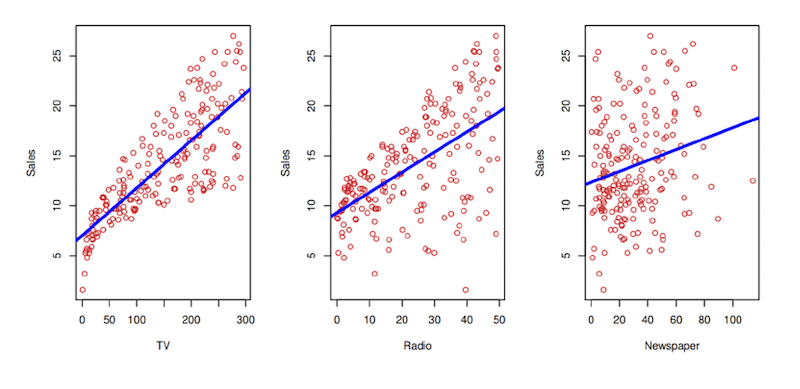

The basic model $Y = f(X) + e$ is just the familiar equation for a line plus an error term:

$
Y = \hat{\beta}_0 + \hat{\beta}_1 X + e
$

where

- $X = [x^1, x^2, ..., x^n]$ and $Y = [y_1, y_2, ..., y_n]$;
- $\hat{\beta}_0$ is the estimated *y-intercept*;
- $\hat{\beta}_1$ is the estimated *slope*; and
- $e$ is the error (combining reducible and irreducible components).

Our goal is to create a model $\hat{Y} = (\hat{\beta}_0, \hat{\beta}_1)$ which will give us predictions:

$
\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X
$

where each value $y_i$ is estimated by $\hat{y}_i$, and the residual error for that data point is $e_i = \hat{y}_i - y_i$, i.e.,

$
y_i = \hat{\beta}_0 + \hat{\beta}_1 x^i + e_i.
$

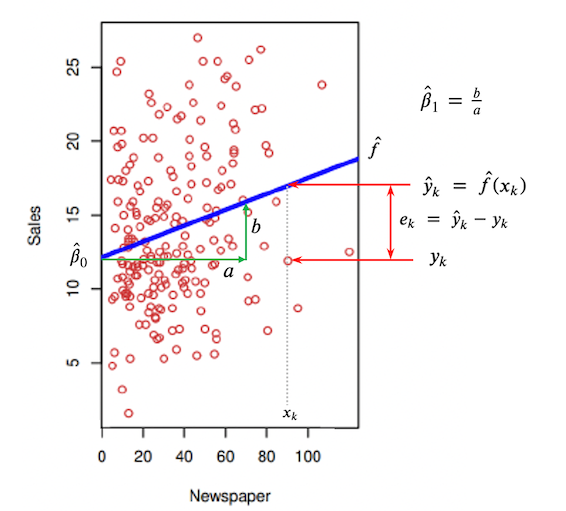

In this simple, first model for supervised learning, we will have to make a number of strong assumptions, which rarely hold in practice, but the technique still usually works quite well!

### Assumptions:
- Linearity: The relationship between predictors and the target is linear with some irreducible error
- Independence: Observations are independent of each other
- Homoscedasticity: The variance of the errors is constant
- Normality: Errors are normally distributed with mean $0$

**Note**: We will be able to relax the first assumption when we consider polynomial regression below. 

### Think About It
- Can you think of any possible datasets where the linearity assumption would be completely inappropriate?
- Can you think of situations in a housing price dataset where the independence assumption might be violated?
- Can you think of any situations in a housing price dataset where homoscedasticity would be violated?
- Why do you think we said, “but the techniques still usually work quite well”?


## Lesson 2.2: Measuring the Accuracy of Linear Regression Models
With a proper measure of model accuracy, judging how well your model fits the data and will (presumably) perform on unseen data is possible. The mean squared error is one of the most commonly used metrics to evaluate regression models.

#### Definition:
The **Mean Squared Error(MSE)** is the average of all the squared errors:

$\text{Mean Squared Error (MSE)} \quad = \quad \frac{e^2_1 + e^2_2 + \cdots + e^2_n}{n}$

When this metric is used, we often refer to the **Least-Squares Regression Line** or the **Method of Least Squares**.

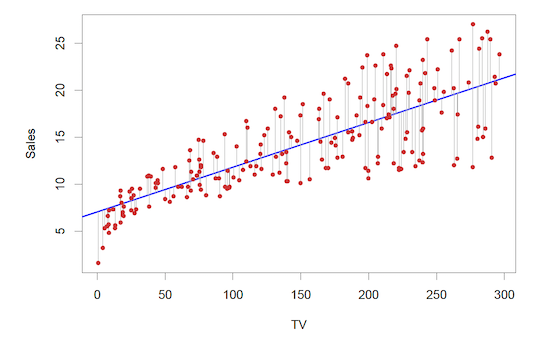

Various error metrics for regression are available (now would be a good time to review the material on L1 and L2 loss from Mod 1). In addition to the MSE, there are two others you might see. 

The **Root Mean Square Error (RMSE)** is the square root of the MSE:

$\text{Root Mean Squared Error (RMSE)} \quad = \quad \sqrt{\frac{e^2_1 + e^2_2 + \cdots + e^2_n}{n}}$

The principal advantage of this metric is that is uses the same units as $Y$, which can be helpful in explainability of the model.

It also provides a beautiful intuition of the cumulative error as the **distance** between the points $(y_1, y_2, \cdots, y_n)$ and $(\hat{y_1}, \hat{y_2}, \cdots, \hat{y_n})$ in $n$-dimensional space (scaled by $\frac{1}{\sqrt{n}}$):

$\sqrt{(\hat{y_1} - y_1)^2 + \cdots + (\hat{y_n} - y_n)^2}$

The **coefficient of determination** or **$R^2$** is

$R^2 \quad = \quad 1 - \frac{ \sum^n_{i = 1}(y_i - \hat{y_i})}{\sum^n_{i=1}(y_i - \bar{Y}^2)}$

Where $\bar{Y} = mean(Y)$

This metric quantifies precisely the proportion of the variance of $Y$ that is predictable from $X$. In other words, it tells you how well the regression model explains the behavior of $Y$ as a collection of values without considering $X$ at all. 

- $R^2 = 1$: This indicates that the model explains all of the variance in ﻿Y﻿. In other words, the error is completely eliminated (the numerator of the fraction is 0), and the data points lie exactly on the regression line. 
- $R^2 = 0$: This indicates that the model explains none of the variance in ﻿Y﻿; the model does no better than simply predicting the mean $\bar{Y}$ for all observations (so the numerator is the same as a denominator). The entire error is potentially reducible (but the model is not reducing it at all).
- $R^2 < 0$: In some cases, especially with poorly fitted models or when using nonlinear data in a linear model, $R^2$ can be negative. This indicates that the model is performing worse than just predicting the mean of the data, meaning the reducible error is large, and the model is failing to reduce it.
$R^2$ essentially quantifies how well the model captures the reducible error in the data. The closer $R^2$ is to $1$, the more successful the model has been at minimizing reducible error. 

Think About It
- MSE is not precisely the same as L2 loss. What is the difference? If our goal is to minimize the errors, does it matter which one we use?
- Would the average of the (unsquared) values make sense here? 
- We could use the L1 loss for linear regression. Can you think of any disadvantages to this?
- Hint: how did you like manipulating complicated formulae containing absolute values in math classes?


## Lesson 2.3: Linear Regression in Practice
Now it's time to calculate the model $\hat{f} \quad = \quad (\hat{\beta}_0, \hat{\beta}_1)$ from a dataset. Fortunately, there are explicit formulae that do all the work. When we study multiple regressions below, you’ll see that a model can be calculated using a beautifully compact formula in linear algebra.

However, such formulae do not exist for models outside the regression paradigm, and in the next lesson, we’ll explore how to search for the estimated parameters using Gradient Descent. 

### Regression Formulae

$$ \Beta_1 \quad = \quad \frac{\sum^n_{i = 1}(x_i - X)(y_i - \bar{Y})}{\sum^n_{i = 1}(x_i - \bar{X})^2}$$
$$ \Beta_0 \quad = \quad \bar{Y} - \beta_1 \bar{X}$$

where

$\bar{X} \quad = \quad mean(X)$

$\bar{Y} \quad = \quad mean(Y)$

Now that we have all the tools to perform linear regression on a dataset let’s see how to do it in practice!

## Regression using the explicit formulae

### Pearson's Correlation Coefficient: Measuring the Linear Trend of Data

**Pearson's Correlation Coefficient** measures the strength and direction of the **linear relationship** between two variables. Intuitively, it answers the question: How closely do the changes in one variable correspond to changes in another variable?

$$\rho(X,Y)\ =\ \frac{\mathbb{E}[X*Y] - \mu_X \mu_Y}{\sigma_X \sigma_Y}$$

where:
- $\mathbb{E}[X*Y]=\frac{\sum^N_{i=1}x_i*y_i}{N}$ is the expected value (mean) of the product of $X$ and $Y$;
- $\mu_X$ and $\mu_Y$ are the means of $X$ and $Y$; and
- $\sigma_X$ and $\sigma_Y$ are the standard deviations of $X$ and $Y$.

The most important thing to remember is:

- $\rho(X,Y)$ measures the strength of the linear relationship between $X$ and $Y$ as a real number in the range $[-1.0 ..1.0].$ It is **not the slope** and its direction is either positive or negative. 

### Explanation [Optional]:
Consider two sequences of integers which alternate between -1 and 1, and the element-wise product of the two;
notice that when X and Y move opposite to each other the signs are opposite and the product is -1; when they move together the signs are the same, and we get 1:

        X  =  [  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1  ]
        Y  =  [ -1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1  ]
    X * Y  =  [ -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1  ]

So,  
- When X and Y tend to move together, the average value of the product $\mathbb{E}[X*Y]$ will be closer to 1.0, 
- When they tend to move opposite to each other, the average will be closer to -1.0. 
- If there is no particular relationship, it will be closer to 0.0 (in our example, $\mathbb{E}[X*Y] = -0.067$). 

However, an arbitrary X and Y do not consist of only 1 and -1, so we want to standardize them to have a mean of 0.0 and a standard deviation of 1.0; then a little algebra gives us the formula:

$$\begin{aligned}
        \mathbb{E}\left[\frac{X-\mu_X}{\sigma_X}*\frac{Y-\mu_Y}{\sigma_Y}\right] 
        &= \mathbb{E}\left[\frac{X*Y -X\mu_Y-Y\mu_X + \mu_X\mu_Y}{\sigma_X\sigma_Y}\right]\\[2ex] 
        &= \frac{\mathbb{E}[X*Y] -\mathbb{E}[X]\mu_Y-\mathbb{E}[Y]\mu_X + \mu_X\mu_Y}{\sigma_X\sigma_Y} \\[2ex] 
        &= \frac{\mathbb{E}[X*Y] -2\mu_X\mu_Y + \mu_X\mu_Y}{\sigma_X\sigma_Y} \\[2ex] 
        &= \frac{\mathbb{E}[X*Y] -\mu_X\mu_Y}{\sigma_X\sigma_Y} \\ 
  \end{aligned}$$

### Correlation Examples

In [1]:
# necessary imports


import numpy as np
from numpy import arange,linspace,mean, var, std
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
from numpy.random import random, randint, uniform, choice, binomial, geometric, poisson, exponential, normal 
from numpy.linalg import inv
import math
import pandas as pd
from sklearn.linear_model import LinearRegression

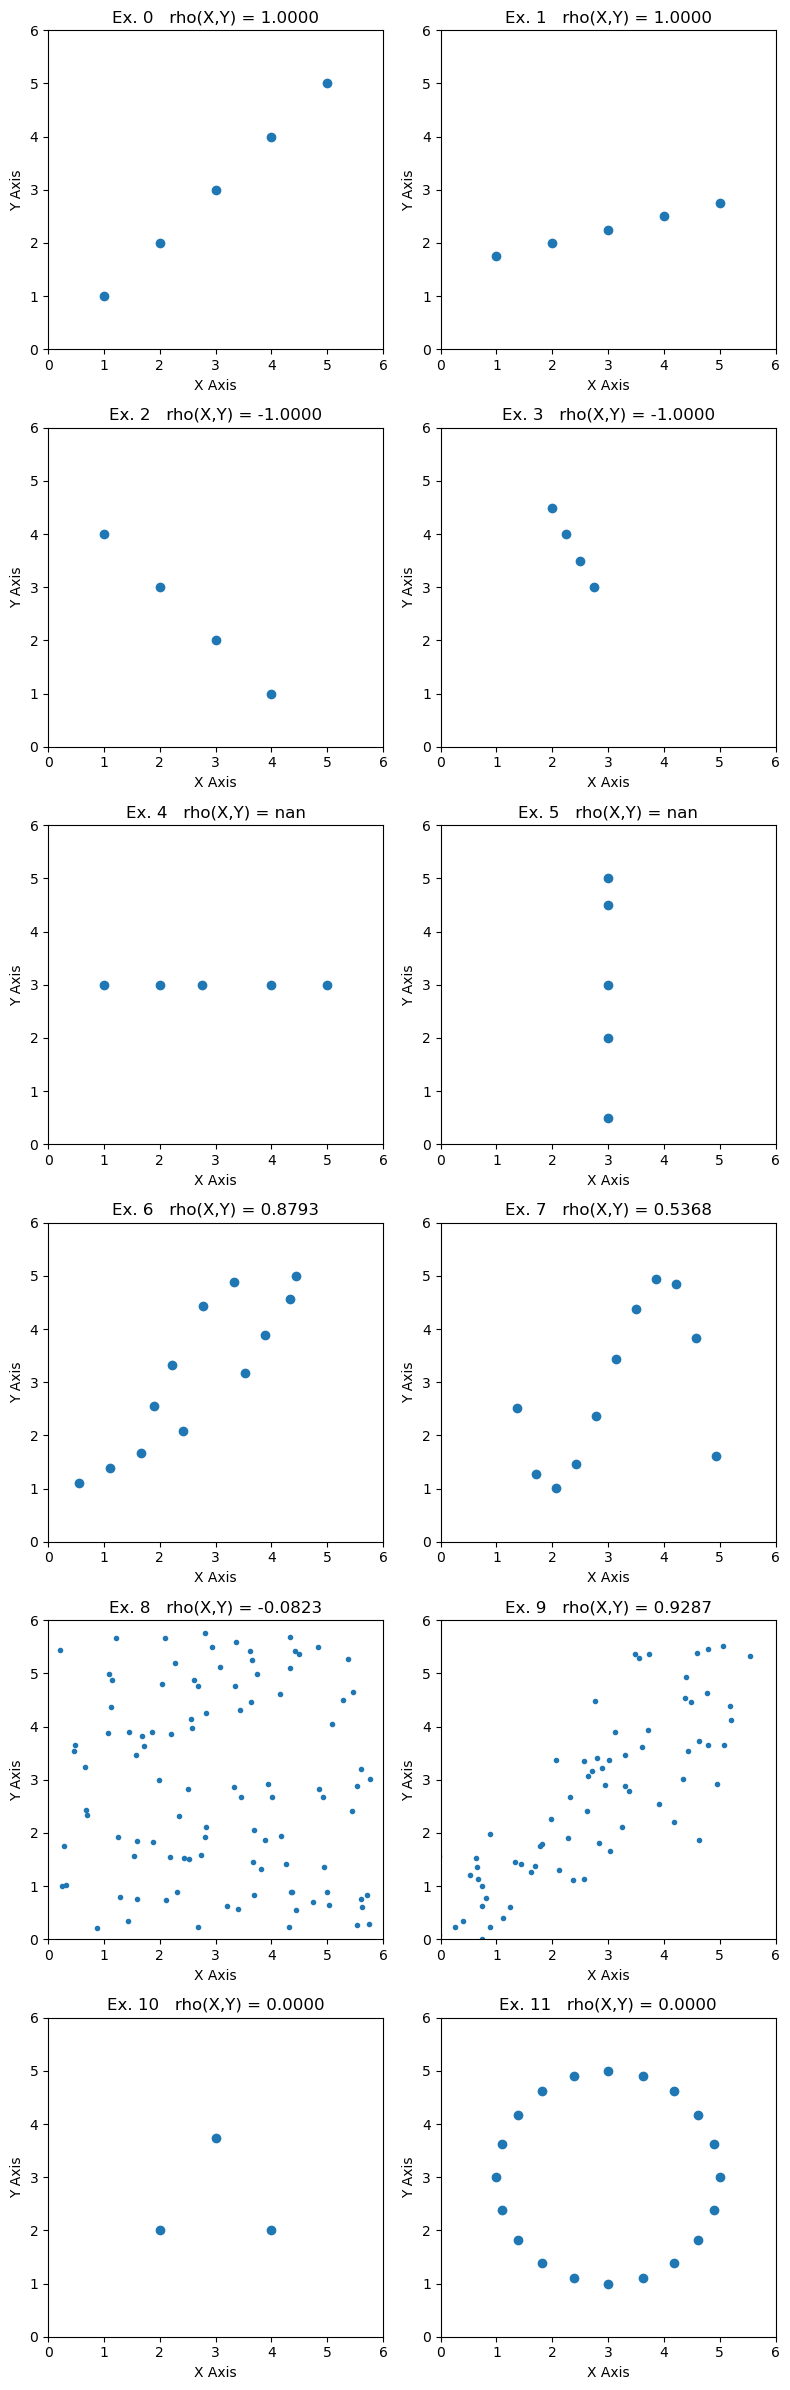

In [2]:
# Code to show examples of Pearson's Correlation Coefficient


def rho(x, y):
    if len(x) == 0 or len(y) == 0:  # Check for empty input
        return float('nan')  # Return NaN for no data
    
    mux = mean(x)
    muy = mean(y)
    sdx = std(x)
    sdy = std(y)
    
    if sdx == 0 or sdy == 0:  # Check for zero standard deviation
        return float('nan')  # Correlation is undefined

    sum_xy = sum(x[i] * y[i] for i in range(len(x)))
    expXY = sum_xy / len(x)

    return (expXY - mux * muy) / (sdx * sdy)


    # using numpy

#     def rho(x,y):
#         return np.corrcoef(x, y)[0][1]

def displayXY(ax, X, Y, title):    
    ax.set_xlim([0,6])
    ax.set_ylim([0,6])
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("X Axis", fontsize=10)
    ax.set_ylabel("Y Axis", fontsize=10)
    
    if len(X) > 20:
        m = "."
    else:
        m = "o"
#     ax.grid()
    ax.scatter(X, Y, marker=m)

def jointNormal(num_trials):
    X = normal(size=num_trials)*2.5 + 2
    Y = X + normal(size=num_trials)
    return (X,Y) 

# Parameters for the circle
center_x, center_y = 3, 3  # Center of the circle
radius = 2                 # Radius of the circle
num_points = 20            # Number of points

# Generate angles equally spaced around the circle
angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)

# Calculate the (x, y) coordinates for each point
X_circ = center_x + radius * np.cos(angles)
Y_circ = center_y + radius * np.sin(angles)
    
    
# Define all examples
examples = [
    ([1, 2, 3, 4,5], [1, 2, 3, 4,5]),
    ([1, 2, 3, 4,5], [1.75, 2.  , 2.25, 2.5,2.75 ]),
    ([1, 2, 3, 4], [4,3,2,1]),
    ([2, 2.25,2.5,2.75], [4.5,4,3.5,3]),
    ([1, 2, 2.76, 4,5], [3,3,3,3,3]),
    ([3,3,3,3,3], [0.5,3,2,4.5,5]),
    ([0.56, 1.67, 1.11, 2.22, 3.33, 1.89, 2.41, 3.52, 3.89, 2.78, 4.33,4.44],
     [1.11, 1.67, 1.39, 3.33, 4.89, 2.56, 2.08, 3.17, 3.89, 4.44, 4.56, 5.  ]),
    ([1.36, 1.71, 2.07, 2.43, 2.79, 3.14, 3.5 , 3.86, 4.21, 4.57,4.93],
     [2.51, 1.27, 1.01, 1.47, 2.37, 3.43, 4.38, 4.94, 4.85, 3.83,1.61]),
    (np.random.uniform(0.2, 5.8, size=100),np.random.uniform(0.2, 5.8, size=100)),
    jointNormal(100),
    ([2,4,3], [2,2,2+math.sqrt(3)]),
    (X_circ,Y_circ)    ]
    
# Create a figure with 5 rows and 2 columns
fig, axes = plt.subplots(6, 2, figsize=(8, 24))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Plot each example
for i, (X, Y) in enumerate(examples):
    if len(X) > 0:
        title = f'Ex. {i}   rho(X,Y) = {rho(X, Y):.4f}'
    else:
        title = "No data points"
    displayXY(axes[i], X, Y, title)

plt.tight_layout()
plt.show()


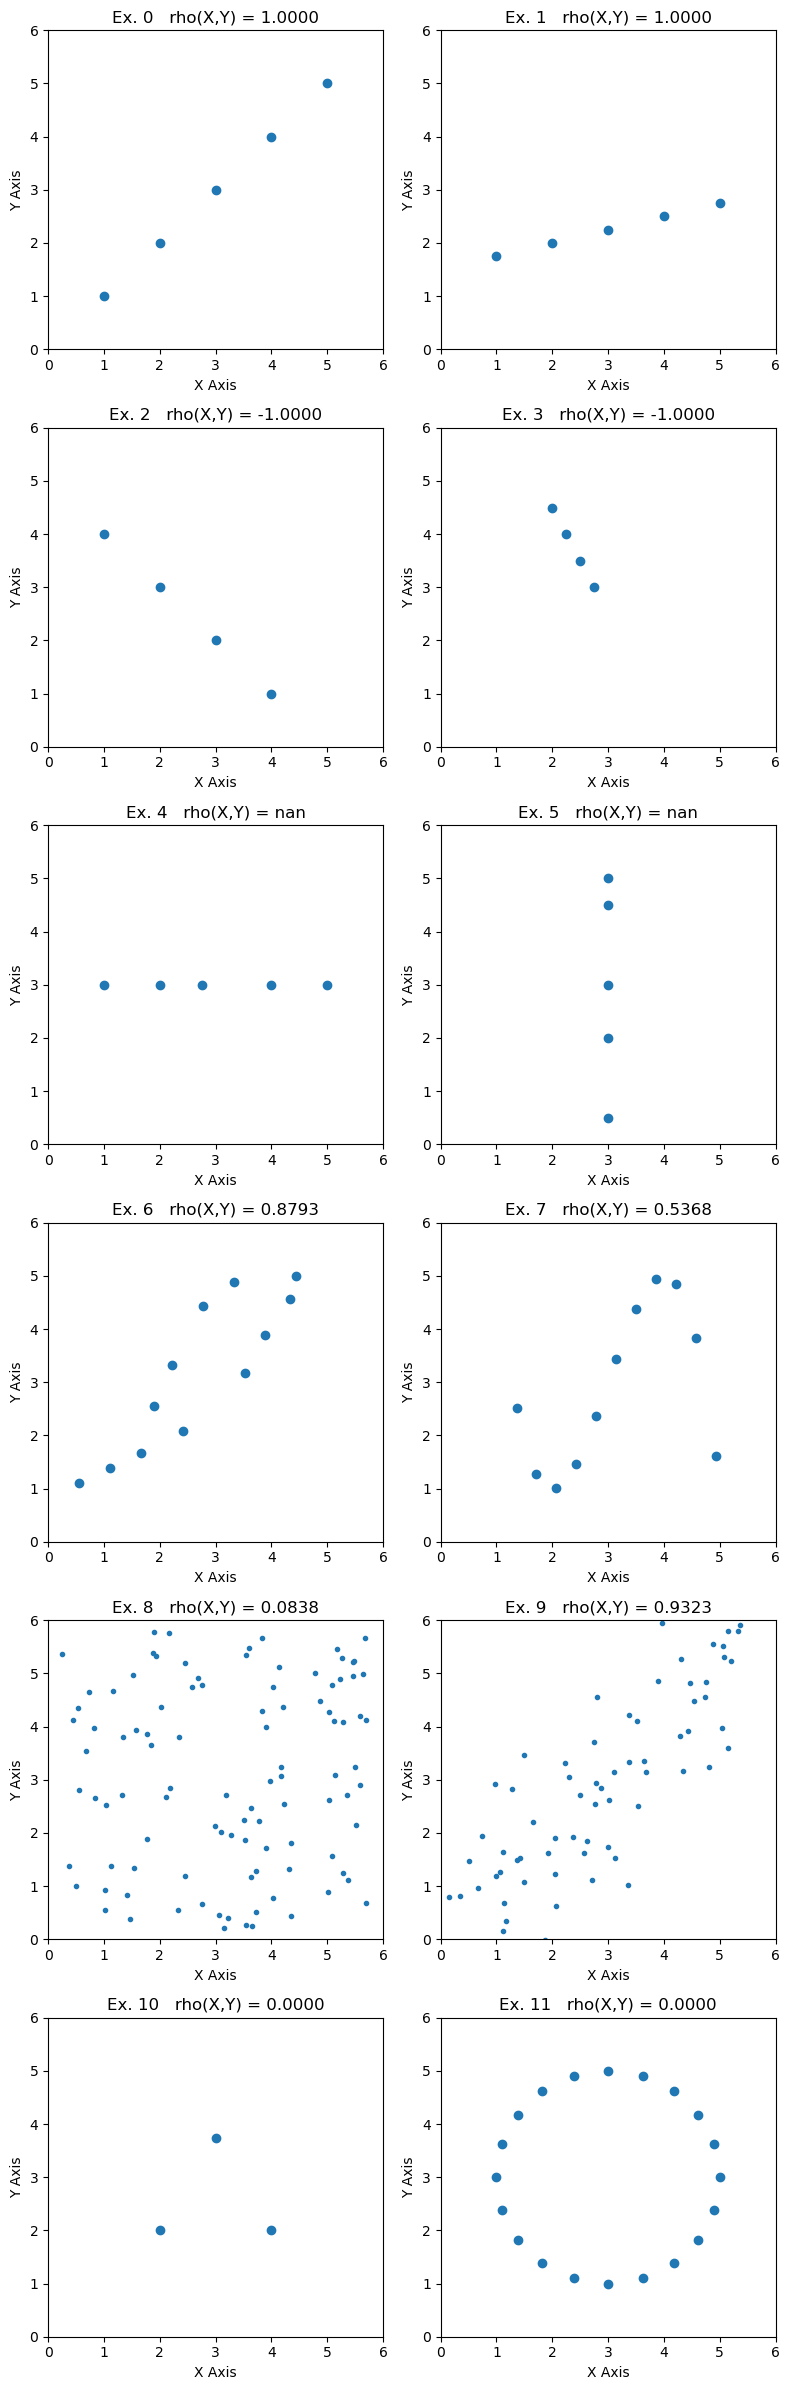

In [3]:
# Code to show examples of Pearson's Correlation Coefficient


def rho(x, y):
    if len(x) == 0 or len(y) == 0:  # Check for empty input
        return float('nan')  # Return NaN for no data
    
    mux = mean(x)
    muy = mean(y)
    sdx = std(x)
    sdy = std(y)
    
    if sdx == 0 or sdy == 0:  # Check for zero standard deviation
        return float('nan')  # Correlation is undefined

    sum_xy = sum(x[i] * y[i] for i in range(len(x)))
    expXY = sum_xy / len(x)

    return (expXY - mux * muy) / (sdx * sdy)


    # using numpy

#     def rho(x,y):
#         return np.corrcoef(x, y)[0][1]

def displayXY(ax, X, Y, title):    
    ax.set_xlim([0,6])
    ax.set_ylim([0,6])
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("X Axis", fontsize=10)
    ax.set_ylabel("Y Axis", fontsize=10)
    
    if len(X) > 20:
        m = "."
    else:
        m = "o"
#     ax.grid()
    ax.scatter(X, Y, marker=m)

def jointNormal(num_trials):
    X = normal(size=num_trials)*2.5 + 2
    Y = X + normal(size=num_trials)
    return (X,Y) 

# Parameters for the circle
center_x, center_y = 3, 3  # Center of the circle
radius = 2                 # Radius of the circle
num_points = 20            # Number of points

# Generate angles equally spaced around the circle
angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)

# Calculate the (x, y) coordinates for each point
X_circ = center_x + radius * np.cos(angles)
Y_circ = center_y + radius * np.sin(angles)
    
    
# Define all examples
examples = [
    ([1, 2, 3, 4,5], [1, 2, 3, 4,5]),
    ([1, 2, 3, 4,5], [1.75, 2.  , 2.25, 2.5,2.75 ]),
    ([1, 2, 3, 4], [4,3,2,1]),
    ([2, 2.25,2.5,2.75], [4.5,4,3.5,3]),
    ([1, 2, 2.76, 4,5], [3,3,3,3,3]),
    ([3,3,3,3,3], [0.5,3,2,4.5,5]),
    ([0.56, 1.67, 1.11, 2.22, 3.33, 1.89, 2.41, 3.52, 3.89, 2.78, 4.33,4.44],
     [1.11, 1.67, 1.39, 3.33, 4.89, 2.56, 2.08, 3.17, 3.89, 4.44, 4.56, 5.  ]),
    ([1.36, 1.71, 2.07, 2.43, 2.79, 3.14, 3.5 , 3.86, 4.21, 4.57,4.93],
     [2.51, 1.27, 1.01, 1.47, 2.37, 3.43, 4.38, 4.94, 4.85, 3.83,1.61]),
    (np.random.uniform(0.2, 5.8, size=100),np.random.uniform(0.2, 5.8, size=100)),
    jointNormal(100),
    ([2,4,3], [2,2,2+math.sqrt(3)]),
    (X_circ,Y_circ)    ]
    
# Create a figure with 5 rows and 2 columns
fig, axes = plt.subplots(6, 2, figsize=(8, 24))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Plot each example
for i, (X, Y) in enumerate(examples):
    if len(X) > 0:
        title = f'Ex. {i}   rho(X,Y) = {rho(X, Y):.4f}'
    else:
        title = "No data points"
    displayXY(axes[i], X, Y, title)

plt.tight_layout()
plt.show()


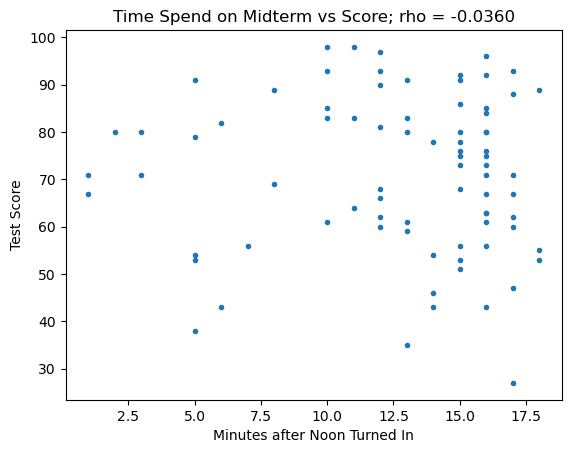

In [4]:
# What is the Correlation between the amount of time spent on a test and the score?
# X = how many minutes after noon turned in   Y = score

Y = [98, 98, 97, 96, 93, 93, 93, 92, 92, 91, 91, 91, 90, 89, 89, 88, 86, 
     85, 85, 84, 83, 83, 83, 82, 81, 80, 80, 80, 80, 80, 80, 79, 78, 78, 
     76, 76, 75, 75, 73, 73, 71, 71, 71, 71, 69, 68, 68, 67, 67, 67, 66, 
     64, 63, 63, 62, 62, 61, 61, 61, 60, 60, 59, 56, 56, 56, 55, 54, 54, 
     53, 53, 53, 51, 47, 46, 43, 43, 43, 38, 35, 27]

X = [10, 11, 12, 16, 17, 10, 12, 16, 15, 5,  15, 13, 12, 8,  18, 17, 15, 
     10, 16, 16, 13, 11, 10, 6,  12, 15, 3,  16, 16, 13, 2,  5,  15, 14, 15, 
     16, 15, 16, 15, 16, 17, 1,  16, 3,  8,  15, 12, 1,  17, 16, 12, 11, 16, 
     16, 12, 17, 10, 13, 16, 17, 12, 13, 15, 16, 7,  18, 14, 5,  15, 18, 5, 
     15, 17, 14, 16, 14, 6, 5, 13, 17]


plt.title(f'Time Spend on Midterm vs Score; rho = {rho(X,Y):.4f}', fontsize=12)
plt.xlabel("Minutes after Noon Turned In", fontsize=10)
plt.ylabel("Test Score", fontsize=10)

plt.scatter(X, Y, marker='.')
plt.show()


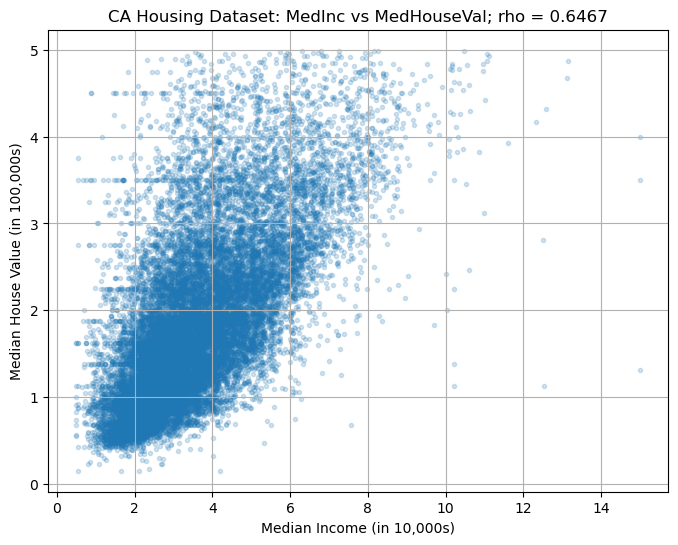

In [5]:
# CA Housing Data: What is correlation between median income and median house value
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Remove data points where 'median_house_value' is capped at $500,000
df_filtered = df[df['MedHouseVal'] < 5.0]  # Values are scaled; 5.0 corresponds to $500,000

# Extract median income and median house value for the filtered data
x_housing = df_filtered['MedInc']
y_housing = df_filtered['MedHouseVal']

# Calculate correlation coefficient
correlation = np.corrcoef(x_housing, y_housing)[0, 1]

# Plot scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(x_housing, y_housing, alpha=0.2, marker='.')
plt.title(f"CA Housing Dataset: MedInc vs MedHouseVal; rho = {correlation:.4f}")
plt.xlabel("Median Income (in 10,000s)")
plt.ylabel("Median House Value (in 100,000s)")
plt.grid(True)
plt.show()



# Linear Regression 

In linear regression in 2D we want to find a model $Y = \beta_0 + \beta_1X$ which minimizes the MSE. 
A simple formula using $\rho$ will give us the parameters. 

The correlation coefficient $\rho$ is a unit-less quantity expressing the strength of the linear trend of a dataset and whether that trend is positive or negative. To obtain the precise slope (the "rise over the run") we scale $\rho$ using the standard deviation of $X$ and $Y$ 

$$\beta_1\ =\ \rho(X,Y)\frac{\sigma_Y}{\sigma_X}$$

and then (since the centroid $(\mu_X,\mu_Y)$ is always on the line) find the y-intercept:

$$\beta_0 = \mu_Y - \beta_1\cdot \mu_X,$$  

giving us the precise formula for the regression line

$$\hat{Y}\ =\ \beta_0 + \beta_1 X.$$

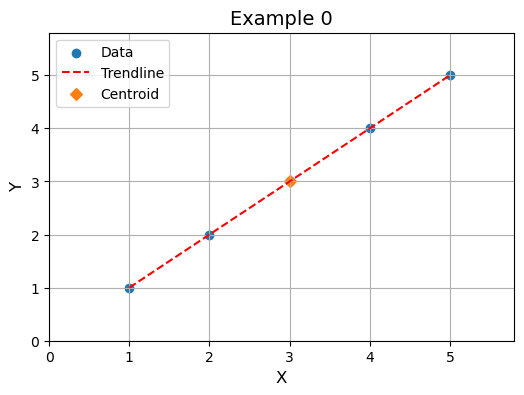

rho: 1.0000	R^2: 1.0000	MSE: 0.0000	Regression Line: Y = 0.0000 + 1.0000 X



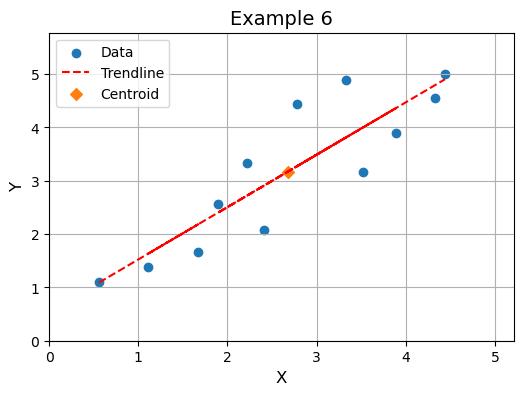

rho: 0.8793	R^2: 0.7732	MSE: 0.4086	Regression Line: Y = 0.5415 + 0.9826 X



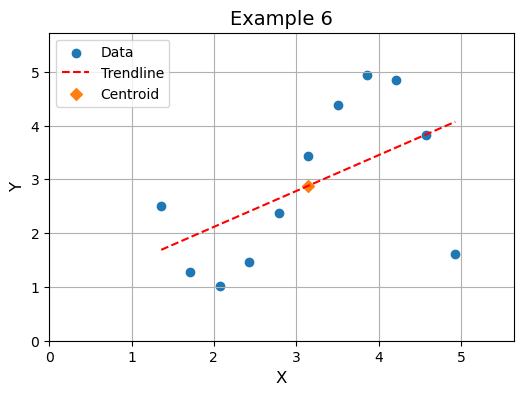

rho: 0.5368	R^2: 0.2881	MSE: 1.4021	Regression Line: Y = 0.7824 + 0.6671 X



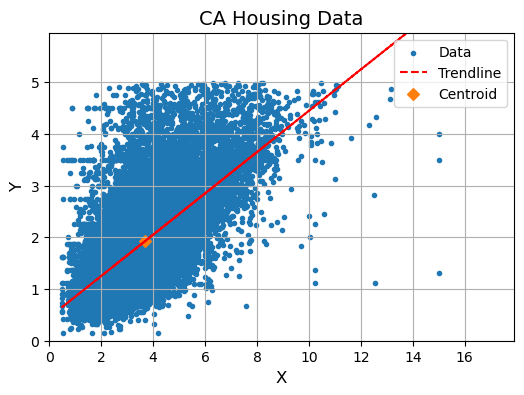

rho: 0.6467	R^2: 0.4182	MSE: 0.5486	Regression Line: Y = 0.4505 + 0.3999 X



In [6]:
# Draw scatterplot for bivariate data and draw linear regression line
# with midpoint (mux,muy)

def MSE(X, Y, m, b):
    return np.mean((Y - (m * X + b))**2)
    
def ScatterTrendline(X,Y,titl="Scatterplot with Trendline", xlab="X",ylab="Y"):
    
    # convert to numpy arrays in case they are not
    X = np.array(X)
    Y = np.array(Y)
    

    # Assuming X and Y are numpy arrays
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)

    # Compute beta_1 (slope)
    beta_1 = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean)**2)

    # Compute beta_0 (intercept)
    beta_0 = Y_mean - beta_1 * X_mean

    # Compute predicted Y values
    Y_pred = beta_0 + beta_1 * X

    # Compute the correlation coefficient (rho)

    rho = np.sum((X - X_mean) * (Y - Y_mean)) / np.sqrt(np.sum((X - X_mean)**2) * np.sum((Y - Y_mean)**2))
    
    # Compute R^2 (coefficient of determination); for simple linear regression it is just rho^2  

    R2 = rho**2

   
    plt.figure(figsize=(6,4))

    # Add padding around the plot
    x_padding = (max(X) - min(X)) * 0.2
    y_padding = (max(Y) - min(Y)) * 0.2
    plt.xlim(0, max(X) + x_padding)
    plt.ylim(0, max(Y) + y_padding) 
    
    
    linex = [X[0]-x_padding,X[-1]+x_padding]
    liney = [Y_pred[0],Y_pred[-1]]
    
    plt.scatter(X,Y, marker='o' if len(X) < 20 else '.')
    plt.plot(X,Y_pred,'r--')
    plt.scatter([X.mean()],[Y.mean()],marker='D')
    plt.grid()
    plt.title(titl,fontsize=14)
    plt.legend(["Data","Trendline","Centroid"],loc='best')
    plt.xlabel(xlab,fontsize=12)
    plt.ylabel(ylab,fontsize=12)
    plt.show()
    
    mse = MSE(X,Y,beta_1,beta_0)
 
    print(f"rho: {rho:.4f}\tR^2: {R2:.4f}\tMSE: {mse:.4f}\tRegression Line: Y = {beta_0:.4f} + {beta_1:.4f} X")
    print()


ScatterTrendline(examples[0][0],examples[0][1],"Example 0","X", "Y")

ScatterTrendline(examples[6][0],examples[6][1],"Example 6","X", "Y")

ScatterTrendline(examples[7][0],examples[7][1],"Example 6","X", "Y")

ScatterTrendline(list(x_housing),list(y_housing),"CA Housing Data","X", "Y")


 ## Linear Regression in Sklearn
 
 Naturally, you want to use the appropriate libraries when doing your work, because they are (presumably) bug-free and more efficient than your own code!
 
 Here is an annotated example of how to use sklearn to do linear regression (it will also work for multiple regression, which we'll cover below).
 


In [7]:
# sample data: this Example 6 from above; reshape as numpy arrays for sklearn

# Assuming X and Y are your data arrays
# X should be a 2D array of shape (n_samples, n_features)
# Y should be a 1D array of shape (n_samples,)


X = np.array(  [1.36, 1.71, 2.07, 2.43, 2.79, 3.14, 3.5 , 3.86, 4.21, 4.57,4.93]  ).reshape(-1,1)  
Y = np.array(  [2.51, 1.27, 1.01, 1.47, 2.37, 3.43, 4.38, 4.94, 4.85, 3.83,1.61]  )   
print('X:',X)
print('Y:',Y)

X: [[1.36]
 [1.71]
 [2.07]
 [2.43]
 [2.79]
 [3.14]
 [3.5 ]
 [3.86]
 [4.21]
 [4.57]
 [4.93]]
Y: [2.51 1.27 1.01 1.47 2.37 3.43 4.38 4.94 4.85 3.83 1.61]


In [8]:
from sklearn.linear_model import LinearRegression
     
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X, Y)

# NOTE - sklearn stores the bias term separately from the others as a scalar
#        rest of the parameters are stored in a list

print(f"beta_0: {model.intercept_}") 
print(f"beta_1: {model.coef_[0]}")          # Since we know there is only one other, extract it from the list

beta_0: 0.7824497708253397
beta_1: 0.6671406572438897


In [9]:
# find the predictions model would make on X

Y_pred = model.predict(X)
print(Y_pred)

[1.68976106 1.92326029 2.16343093 2.40360157 2.6437722  2.87727143
 3.11744207 3.35761271 3.59111194 3.83128257 4.07145321]


In [10]:
# Find MSE and R^2

from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE
mse = mean_squared_error(Y, Y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R²
r2 = r2_score(Y, Y_pred)
print(f'R² Score: {r2}')

Mean Squared Error: 1.4021427805504147
R² Score: 0.2881371214762296


## Your Turn!

In the next cell, cut and paste `ScatterTrendline` from above, and rewrite it to use `LinearRegression` to calculate the slope and intercept and use `mean_squared_error` and `r2_score` to print out the metrics.
Then show how to display the trend line for the dataset in this section. 

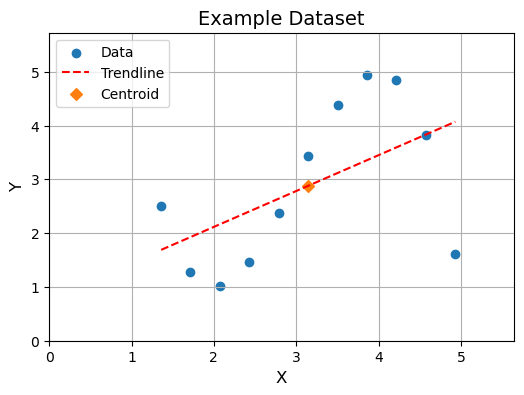

rho: 0.5368	R^2: 0.2881	MSE: 1.4021	Regression Line: Y = 0.7824 + 0.6671 X



In [12]:
# your code here

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def ScatterTrendline(X, Y, titl="Scatterplot with Trendline", xlab="X", ylab="Y"):
    # convert to numpy arrays in case they are not
    X = np.array(X).reshape(-1, 1)
    Y = np.array(Y)
    
    # Initialize the model
    model = LinearRegression()

    # Train the model
    model.fit(X, Y)

    # Get the slope (beta_1) and intercept (beta_0)
    beta_1 = model.coef_[0]
    beta_0 = model.intercept_

    # Predict Y values
    Y_pred = model.predict(X)

    # Calculate metrics
    mse = mean_squared_error(Y, Y_pred)
    r2 = r2_score(Y, Y_pred)
    rho = np.corrcoef(X.flatten(), Y)[0, 1]

    plt.figure(figsize=(6, 4))

    # Add padding around the plot
    x_padding = (max(X) - min(X)) * 0.2
    y_padding = (max(Y) - min(Y)) * 0.2
    plt.xlim(0, max(X) + x_padding)
    plt.ylim(0, max(Y) + y_padding) 
    
    plt.scatter(X, Y, marker='o' if len(X) < 20 else '.')
    plt.plot(X, Y_pred, 'r--')
    plt.scatter([X.mean()], [Y.mean()], marker='D')
    plt.grid()
    plt.title(titl, fontsize=14)
    plt.legend(["Data", "Trendline", "Centroid"], loc='best')
    plt.xlabel(xlab, fontsize=12)
    plt.ylabel(ylab, fontsize=12)
    plt.show()
    
    print(f"rho: {rho:.4f}\tR^2: {r2:.4f}\tMSE: {mse:.4f}\tRegression Line: Y = {beta_0:.4f} + {beta_1:.4f} X")
    print()

# Example usage with the dataset in this section
ScatterTrendline(X, Y, "Example Dataset", "X", "Y")

## 2.4 Lesson: Estimating Parameters using Gradient Descent
**Gradient Descent** is an optimization algorithm used to estimate the parameters of a model by iteratively adjusting the parameters to minimize the error. It works by computing the error's gradient (or slope) with respect to the model parameters and updating the parameters in the direction of the negative gradient. The step size (learning rate) controls how much the parameters are adjusted in each iteration. The process continues until the algorithm converges to a minimum, ideally, the global minimum, where the error is minimized, and the optimal parameters are found.

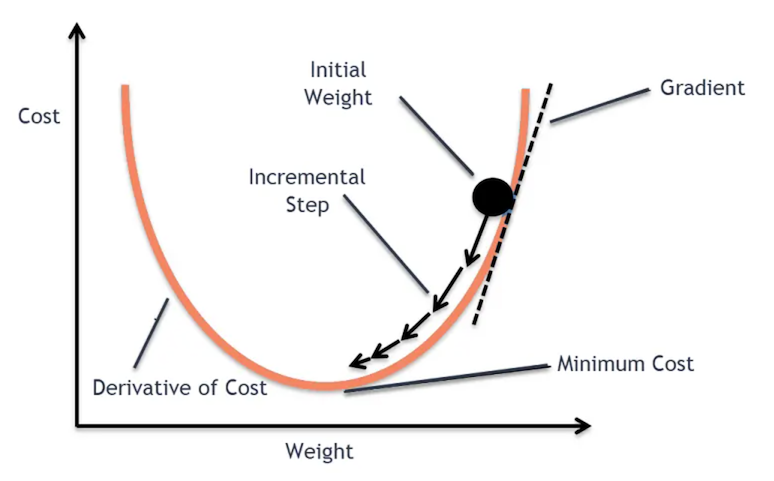

This method is omnipresent in machine learning, especially when dealing with large datasets or models with many parameters, where exact formulae may not exist, or exact results may be computationally expensive.

## Professor Snyder's Workbook: Gradient Descent
For linear regression and its extensions, we have explicit formula for calculating the model directly. However, this usually does not hold for more complex models. Therefore it seems useful to think about how we might solve the problem of finding linear models by "gradient descent" which is a smart way to search for the model parameters which minimize the MSE.

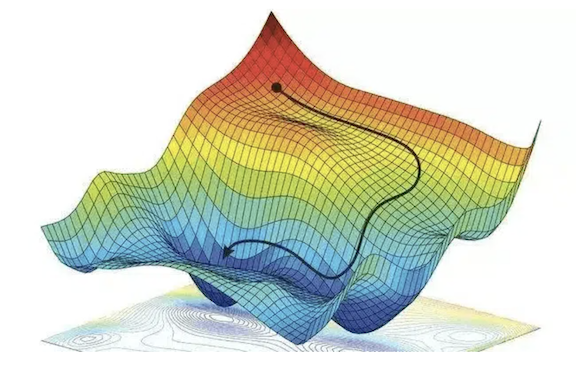


###  Gradient Descent: A Brief Explanation [Optional]

Gradient descent is an optimization algorithm used to minimize a function by iteratively moving in the direction of steepest descent (i.e., the negative gradient). It’s commonly used in machine learning to minimize a loss function and optimize model parameters.

---

**Key Idea**
The gradient of a function points in the direction of the steepest increase. To minimize a function, we take steps in the opposite direction of the gradient.

If $f(\theta)$ is the function to minimize (e.g., a loss function), gradient descent updates the parameters $\theta$ as follows:

$$
\theta_{\text{new}} = \theta_{\text{current}} - \eta \nabla f(\theta_{\text{current}})
$$

Where:
- $\theta$: The parameter(s) we are optimizing.
- $\eta$: The learning rate, which controls the size of each step.
- $\nabla f(\theta)$: The gradient (vector of partial derivatives) of $f$ at $\theta_{\text{current}}$.

---

**Step-by-Step Process**
1. **Initialize parameters** $\theta$ (randomly or with a guess).
2. **Compute the gradient** $\nabla f(\theta)$ of the function at the current $\theta$.
3. **Update the parameters** using the formula above.
4. **Repeat** until the parameters converge or a stopping condition (e.g., small change in $f(\theta)$) is met.

---

### **Key Concepts**
1. **Learning Rate ($\eta$):**
   - If $\eta$ is too large, the algorithm may overshoot and fail to converge.
   - If $\eta$ is too small, convergence may be very slow.

2. **Gradient:**
   - For a single-variable function $f(x)$, the gradient is the derivative $f'(x)$.
   - For multivariable functions, the gradient is a vector of partial derivatives:
     $$
     \nabla f(\theta) = \left( \frac{\partial f}{\partial \theta_1}, \frac{\partial f}{\partial \theta_2}, \dots, \frac{\partial f}{\partial \theta_n} \right).
     $$

3. **Convergence:**
   - Gradient descent seeks a point where $\nabla f(\theta) = 0$, i.e., a local minimum.



### Gradient Descent Example with One Parameter (slope)

In the very simplest linear regression problems, we are looking for a line which passes through the origin; therefore we need only determine a single parameter, the slope of the line. The simplified formula for $\beta_1$ when we know $\beta_0=0$ is

$$
\beta_1 = \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2}
$$

If we solve Problem 6 from above with this assumption, we get this model:

$$Y = 1.150938 \cdot X$$

with an MSE = 0.457689.   (Floats rounded to 6 places.)


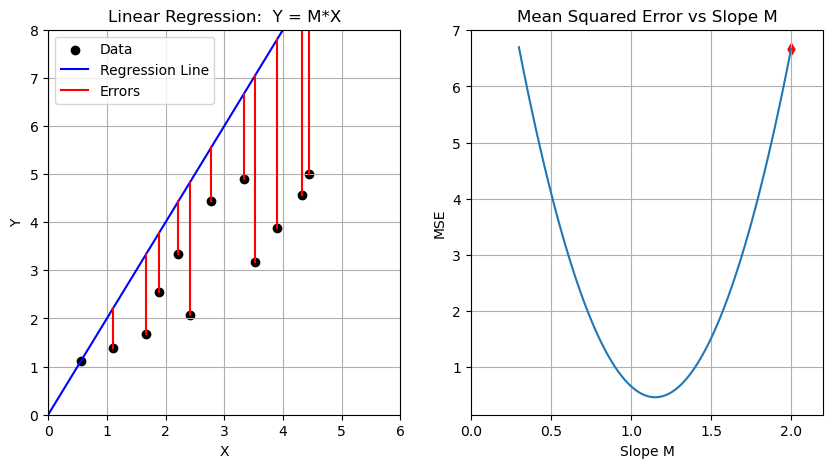

	Slope M = 2	Mean Squared Error: 6.672225



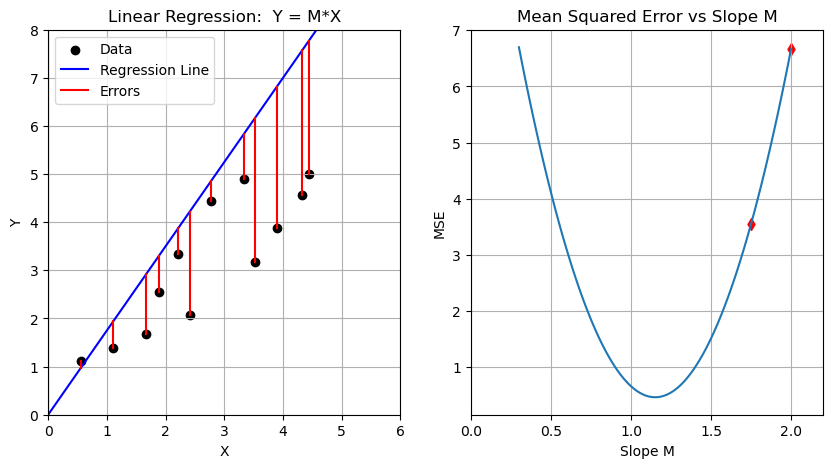

	Slope M = 1.75	Mean Squared Error: 3.551354



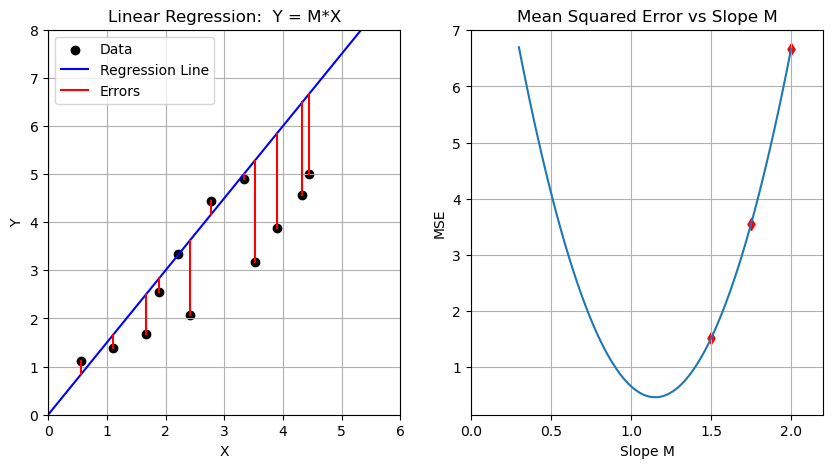

	Slope M = 1.5	Mean Squared Error: 1.508040



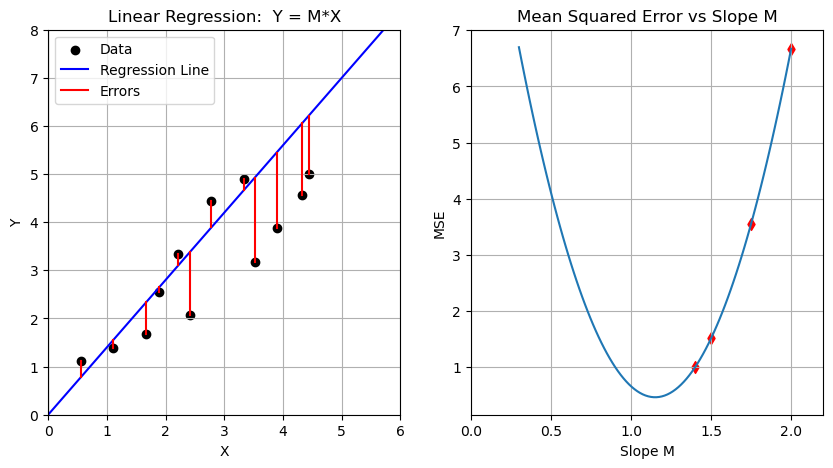

	Slope M = 1.4	Mean Squared Error: 0.992430



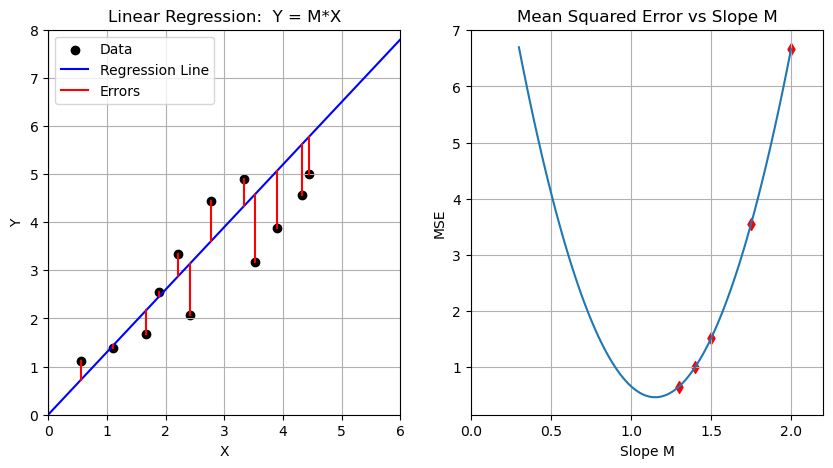

	Slope M = 1.3	Mean Squared Error: 0.649230



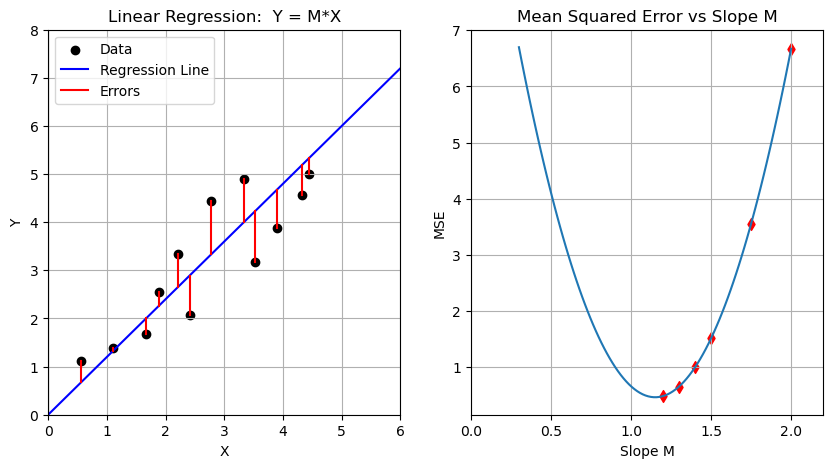

	Slope M = 1.2	Mean Squared Error: 0.478438



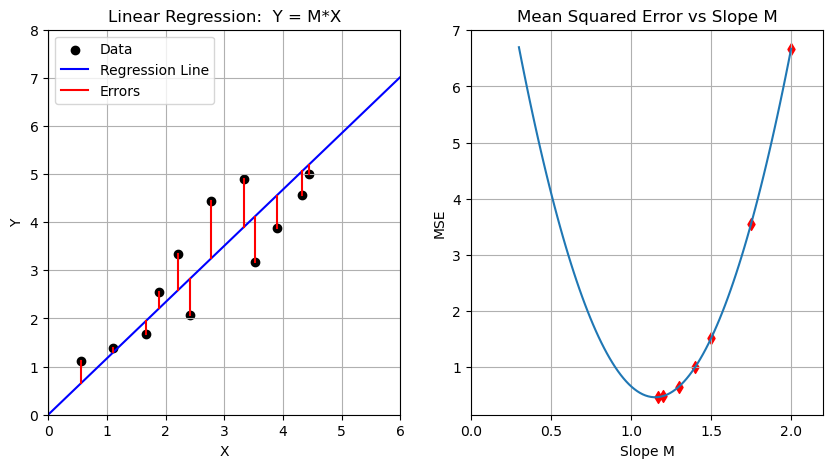

	Slope M = 1.17	Mean Squared Error: 0.460821



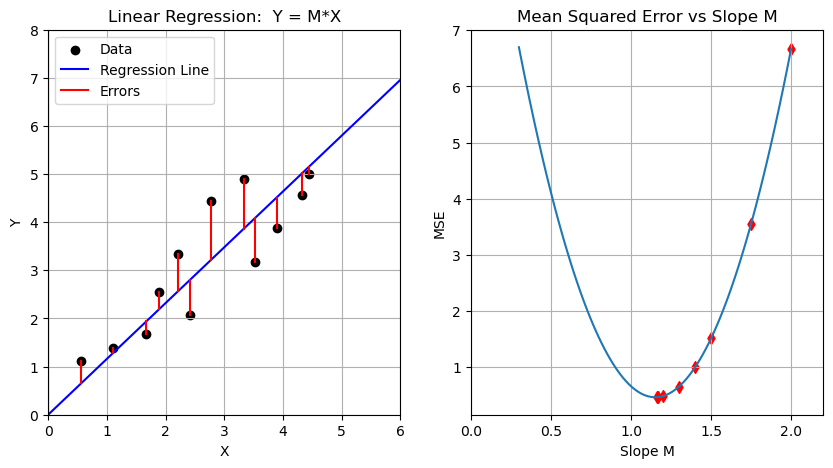

	Slope M = 1.16	Mean Squared Error: 0.458396



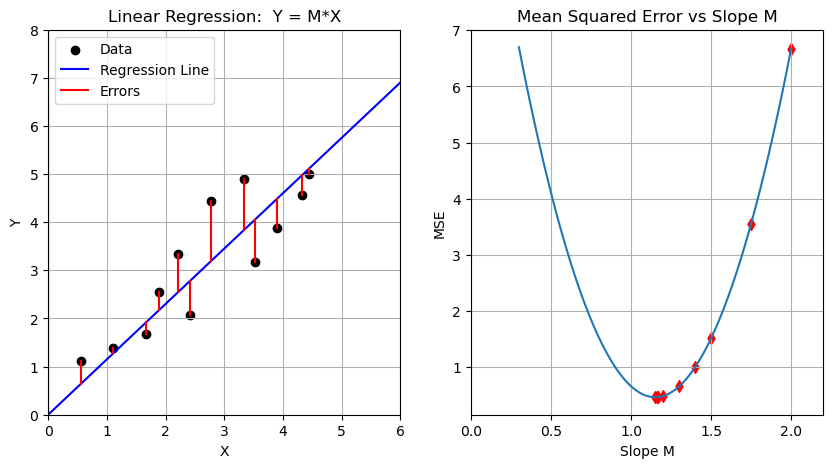

	Slope M = 1.150938	Mean Squared Error: 0.457689


In [13]:
# One parameter Example 6

X = np.array([0.56, 1.67, 1.11, 2.22, 3.33, 1.89, 2.41, 3.52, 3.89, 2.78, 4.33,4.44])
Y = np.array([1.11, 1.67, 1.39, 3.33, 4.89, 2.56, 2.08, 3.17, 3.89, 4.44, 4.56, 5.  ])

# X = [1,3,2  ,4,6  ,3.4  ,4.34,6.33,7,5,7.8, 8 ]
# Y = [2,3,2.5,6,8.8,4.6,3.75,5.7,7,8,8.2,9]

Wx = []
Wy = []

for slope in [2,1.75,1.5,1.4,1.3,1.2,1.17,1.16,1.150938]:


    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)

    plt.title("Linear Regression:  Y = M*X")

    plt.plot([0,0],[0,10],color='grey')
    plt.plot([0,0],[0,10],color='grey')


    plt.scatter(X,Y,color='k',marker ='o',label="Data")
    plt.plot([0,8],[0,slope*8],color='b',label="Regression Line")

    plt.plot([X[0],X[0]],[Y[0],slope*X[0]],color='r',label="Errors")
    for k in range(1,len(X)):
        plt.plot([X[k],X[k]],[Y[k],slope*X[k]],color='r')

    plt.grid()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.xlim([0,6])
    plt.ylim([0,8])
    plt.legend(loc="best")
    # plt.show()


    print()
    # Plot MSE for slope from 1/5 to 5

    Xplot = np.linspace(0.3,2.0,100)
    Yhat = [ MSE(X,Y,slope,0) for slope in Xplot]

    plt.subplot(1, 2, 2)
    # plt.figure(figsize=(5,5))
    plt.title("Mean Squared Error vs Slope M")
    plt.plot(Xplot,Yhat)
    Wx.append(slope)
    Wy.append(MSE(X,Y,slope,0))
    plt.scatter(Wx,Wy,color='r',marker='d')
    plt.grid()
    plt.xlim([0,2.2])
    # plt.ylim([0,10])
    plt.xlabel('Slope M')
    plt.ylabel('MSE')
    plt.show()
    
    print(f'\tSlope M = {slope}\tMean Squared Error: {np.around(MSE(X,Y,slope,0),6):.6f}')


### Gradient Descent Example with Two Parameters (slope and intercept)

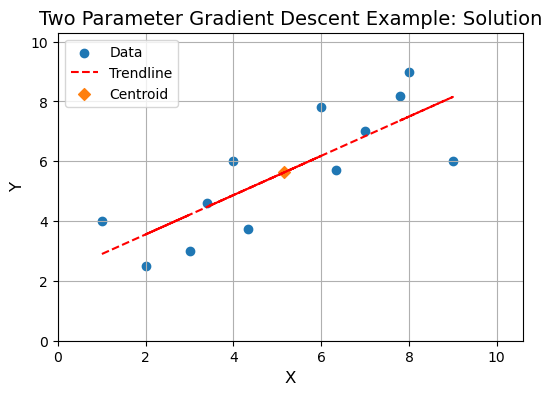

rho: 0.7993	R^2: 0.6389	MSE: 1.4682	Regression Line: Y = 2.2439 + 0.6566 X



In [15]:
# Example for 2 parameter case
X = np.array([1, 3, 2, 4, 6, 3.4, 4.34, 6.33, 7, 9, 7.8, 8])
Y = np.array([4, 3, 2.5, 6, 7.8, 4.6, 3.75, 5.7, 7, 6, 8.2, 9])

ScatterTrendline(X,Y,"Two Parameter Gradient Descent Example: Solution","X", "Y")

Precise solution:  

    rho: 0.7993	R^2: 0.6389	MSE: 1.4688	Regression Line: Y = 2.1876 + 0.6655 X

<function matplotlib.pyplot.show(close=None, block=None)>

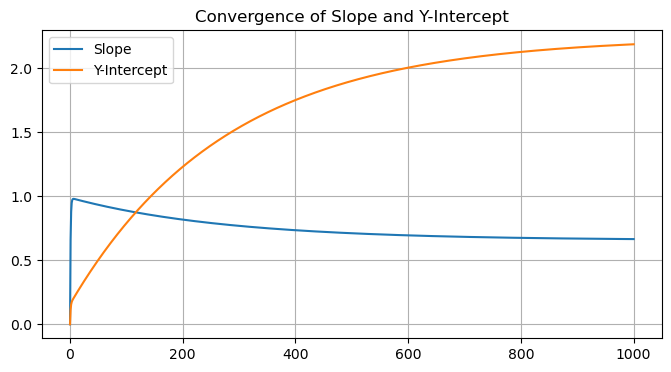

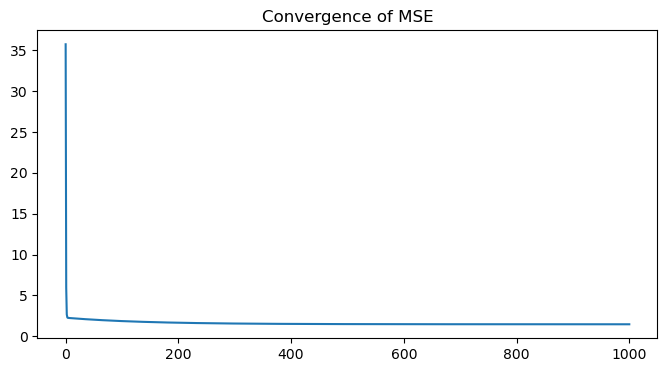

In [18]:
# Display of parameter convergence
plt.figure(figsize=(8,4))
plt.title('Convergence of Slope and Y-Intercept')
plt.plot(range(len(ms)),ms,label='Slope')
# plt.scatter(range(len(ms)),ms,marker='.')
plt.plot(range(len(bs)),bs,label='Y-Intercept')
plt.grid()
plt.legend()
plt.show

plt.figure(figsize=(8,4))
plt.title('Convergence of MSE')
plt.plot(range(len(errors)),errors,label="MSE")
plt.show

## 2.5 Lesson: Extending Linear Regression: Multiple and Polynomial Regression
What if your data does not fit the fundamental linear assumption? Or if you have more than one predictor (such as in our Housing Price example). Understanding how to extend linear regression in these cases allows you to capture more complex patterns in your data.

[Warning! Linear algebra ahead! This might be a good time to review matrix algebra from Module 1 or Chapter 1 from Introduction to Statistical Learning.]

### Multiple Regression

In multiple linear regression, we have $n \geq 2$ independent variables and seek a linear model:

$\hat{f} \quad = \quad (\beta_0, \beta_1, \cdots, \beta_{n})$

Instead of models being lines (in the case $n = 1$), we now estimate models that are planes (for $n=2$) or hyper-planes (for $n > 2$), This is impossible to visualize effectively for a large $n$ but at least in the case of $n=2$ we can see the extension from a line to a plan quite easily:

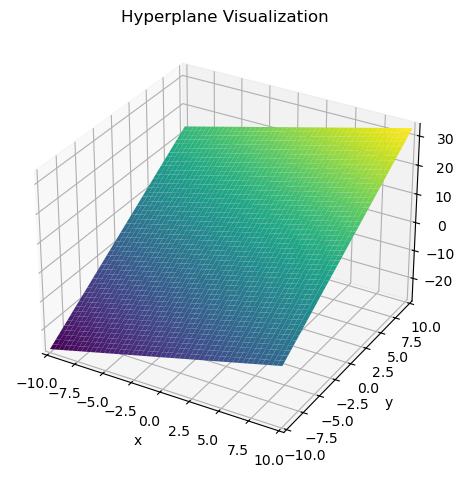

In [19]:
import sympy as sp
from sympy.plotting import plot3d

# Define the variables
x, y = sp.symbols('x y')

# Define the hyperplane equation z = ax + by + c
a, b, c = 1, 2, 3  # Example coefficients
z = a * x + b * y + c

# Plot the hyperplane
plot3d(z, (x, -10, 10), (y, -10, 10), title='Hyperplane Visualization', xlabel='x', ylabel='y', zlabel='z')

We will represent the estimated parameters of a a linear model in $n$ unknowns as a column vector $\beta = [\beta_0, \beta_1, \cdots, \beta_n]^{\top}$,

Where $\beta_0$ is the *constant term$ and we encode the $i^{th}$ datapoint as $[1, x_{i, 1}, \cdots, x_{i,n}, y_i]$.

A set of $m$ datapoints is thus represented by a matrix

$$
X \quad = \quad
\begin{bmatrix}
1 & x_{1,1} & x_{1,2} & \cdots & x_{1,n} \\
1 & x_{2,1} & x_{2,2} & \cdots & x_{2,n} \\
\ldots\\
1 & x_{2,1} & x_{2,2} & \cdots & x_{2,n} \\
1 & x_{m,1} & x_{m,2} & \cdots & x_{m,n}
\end{bmatrix}
$$

and a column vector $Y = [y_1, y_2, \cdots, y_m]^\top$, with the residuals as $\Epsilon = [\epsilon_1, \epsilon_2, \cdots, \epsilon_m]^\top$.

We thus have $Y = X \beta + \Epsilon$ or

$$
\begin{bmatrix}
y_1\\
y_2\\
\ldots\\
y_m
\end{bmatrix}
\quad = \quad
\begin{bmatrix}
 & x_{1,1} & x_{1,2} & \cdots & x_{1,n} \\
1 & x_{2,1} & x_{2,2} & \cdots & x_{2,n} \\
\ldots\\
1 & x_{2,1} & x_{2,2} & \cdots & x_{2,n} \\
1 & x_{m,1} & x_{m,2} & \cdots & x_{m,n}
\end{bmatrix}
\times
\begin{bmatrix}
\beta_1\\
\beta_2\\
\ldots\\
\beta_m
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_1\\
\epsilon_2\\
\ldots\\
\epsilon_m\\
\end{bmatrix}
$$

The least-squares estimates for $\beta$ are given by the concise formula $\beta \quad = \quad (X^\top X)^{-1}X^\top Y$, which would be written in python as:

`beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)`

What an elegant formula for such a complicated algorithm! (This is why all data scientists have to study linear algebra!)

Although there is an explicit formula for multiple regression, gradient descent is often used when dealing with large-scale or streaming data or when the computational cost of matrix inversion is too high.


### Polynomial Regression

Linear regression is a powerful technique for prediction when the relationship between $X$ and $Y$ is fundamentally linear, but how do we deal with more complex relationships?

The key observation in extending the regression framework to these more complex datasets is that instead of computing the least-squares solution to a linear equation (a polynomial of degree 1)

$ Y \quad = \quad \beta_0 + \beta_1 X$

we could fit a model to a quadratic equation (a polynomial of degree 2)

$Y \quad = \quad \beta_0 + \beta_1 X + \beta_2 X^2$

or, in general, to a polynomial of degree $n$:

$Y \quad = \quad \beta_0 + \beta_1 X + \beta_2 X^2 + \cdots + \beta_n X^n$

The key observation here is that **this model is still linear in its coefficients**, and so polynomial regression is actually a form of multiple regression, as we can see by specifying the model as a tuple:

$\hat{f} \quad = \quad (\beta_0, \beta_1X +  \cdots + \beta_n)$

However, unlike multiple regression, we can view the model as a curve (instead of a line or hyper-plane) on a 2D plot. The MSE and $R^2$ metrics can still be used, only now the errors are the distance of the actual $Y$ values from the predicted curve instead of a straight line.  

Let us consider a new dataset, which clearly does not exhibit a simple linear relationship between $X$ and $Y$. 

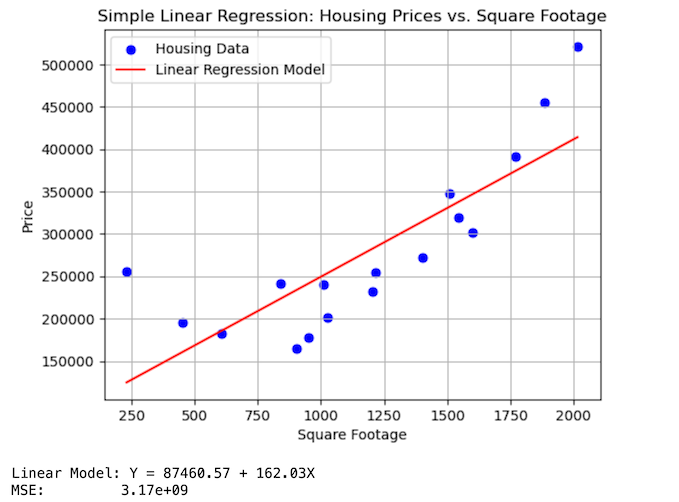

This still doesnt capture the relationship between $X$ and $Y$, does it?

he relationship seems more like a parabola, so a quadratic equation might be a better fit. This is confirmed by an MSE that is almost an order of magnitude smaller!

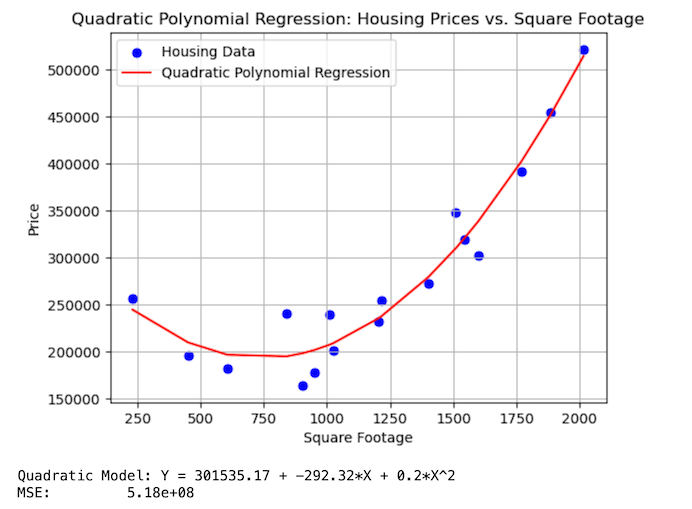

We’ve corrected our model, but now we have a difficult question: What degree polynomial best captures the most meaningful relationship between $X$ and $Y$ for the goals of our project?

### Think About It
- Would the matrix and linear algebra formula work for the 2D case we started this lesson with? What would the matrices look like?
- What are the risks associated with adding higher-order terms in polynomial regression?
- How does increasing the number of predictors affect the interpretability of the model?
- How efficient is the linear algebra formula for generating the model? (Hint: find out how expensive it is, in terms of ﻿n﻿, to calculate the matrix inverse and multiplication.)

## Multiple Regression Examples

We provide examples of 

- A simple synthetic dataset,
- Heights of students as predicted by heights of parents;
- Heart disease index as predicted by levels of biking and smoking. 

**NOTE: You will need to have `plotly` installed if you want to display the interactive figures in this section.**

In [20]:
# 2D regression on synthetic example data

import plotly.graph_objects as go
    
def two_dimensional_regression(X,Y, X1_label='X1',X2_label='X2',Y_label='Y',verbose=False,):
    
    N = X.shape[1]
    
    if verbose:
        print("Number of data points:", N)
 
    # Here is how to do it with explicit preprocessing of data file and linear algebra formula
    
    # add column of 1's to matrix X to encode bias term

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Calculate the Beta (coefficients) using the normal equation
    
    Beta = np.linalg.inv(X.T @ X) @ X.T @ Y
    
    # here is how to do it if using sklearn
    
#     model = LinearRegression(fit_intercept=True)  # fit_intercept=True handles the bias term
#     model.fit(X, Y)
    
#     # sklearn separates the bias term from the other coefficients; let's put them all together in Beta
    
#     Beta = np.hstack(([ model.intercept_ ], model.coef_ ))

    print(Beta)

    if verbose:
        print(f"\nRegression Plane: y = {Beta[0]:.4f} + {Beta[1]:.4f} * x1 + {Beta[2]:.4f} * x2")

    # Dynamically create grid for surface based on data range
    
    X_surface, Y_surface = np.meshgrid(np.linspace(X[:,-2].min(), X[:,-2].max(), 50), 
                                       np.linspace(X[:,-1].min(), X[:,-1].max(), 50) )
    Z_surface = Beta[0] + Beta[1] * X_surface + Beta[2] * Y_surface

    # Predicted Z values for each (X1, Y1)
    Y_pred = Beta[0] + Beta[1] * X[:,-2] + Beta[2] * X[:,-1]

    # Calculate errors
    errors = Y - Y_pred
    mse = np.mean(errors**2)
    r_squared = 1 - (np.sum(errors**2) / np.sum((Y - np.mean(Y))**2))

    if verbose:
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"R²: {r_squared:.4f}")

    # Create scatter plot of original data
    scatter = go.Scatter3d(
        x=X[:,-2],
        y=X[:,-1],
        z=Y,
        mode='markers',
        marker=dict(size=3, color='blue'),
        name="Data Points"
    )

    # Create surface plot of the regression plane
    surface = go.Surface(
        x=X_surface,
        y=Y_surface,
        z=Z_surface,
        opacity=0.8,
        colorscale='viridis',
        name="Regression Plane",
        showscale=False  
    )

    # Create error lines (dotted red lines)
    error_lines = []
    predicted_points = []
    for x, y, z, Y_pred in zip(X[:,-2], X[:,-1], Y, Y_pred):
        # Line connecting data point to its prediction
        error_lines.append(
            go.Scatter3d(
                x=[x, x],
                y=[y, y],
                z=[z, Y_pred],
                mode='lines',
                line=dict(color='red', width=2, dash='dot'),
                name="Error Lines",
                showlegend=False
            )
        )
        # Red dot at the predicted point on the plane
        predicted_points.append(
            go.Scatter3d(
                x=[x],
                y=[y],
                z=[Y_pred],
                mode='markers',
                marker=dict(size=2, color='red'),
                name="Predicted Points",
                showlegend=False
            )
        )

    # Layout
    layout = go.Layout(
        title="Multiple Linear Regression with Error Visualization",
        scene=dict(
            xaxis_title=X1_label,
            yaxis_title=X2_label,
            zaxis_title=Y_label
        ),
        height=800  # Adjust the height of the visualization window
    )

    # Create figure
    fig = go.Figure(data=[scatter, surface] + error_lines + predicted_points, layout=layout)
    fig.show()


    print(f'MSE: {mse:.4f}')
    print(f'R^2: {r_squared:.4f}')
    
test_X = np.array(
      [[2, 4],
       [4, 3],
       [5, 3],
       [6, 4],
       [5, 8],
       [4, 1],
       [1, 2],
       [4, 1],
       [3, 4]])
test_Y = np.array([7, 5, 4, 8, 7, 2, 3, 3, 2])
two_dimensional_regression(test_X,test_Y)

[1.23144481 0.31892543 0.6357844 ]


MSE: 2.5080
R^2: 0.4654


# Lesson 2.5:   Polynomial Regression

We can use multiple regression to fit a polynomial model to a dataset, using a transformation on the data which allows us to recast the problem in a linear framework. The principle is easiest to see in 2D. Suppose
we have a dataset

       X = [ 1,2,3,4,5,6,7]         Y = [ 2,3,5,3,4,6,2]

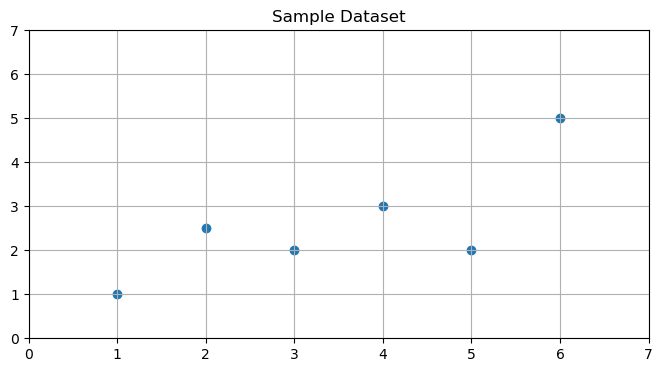

In [22]:
# sample dataset

Xs = np.array([ 1,2,3,4,5,6])         
Y = np.array([ 1,2.5,2,3,2,5])

plt.figure(figsize=(8,4))
plt.title("Sample Dataset")
plt.xlim([0,7])
plt.ylim([0,7])
plt.scatter(Xs,Y)
plt.grid()
plt.show()

To fit a linear model $Y = \beta_0 + \beta_1X$,  we find $\beta_0, \beta_1$ such that the MSE

$$\sum_{i=1}^N\frac{(\beta_0 +\beta_1\cdot x_i-y_i)^2}{N}$$

is minimized.  To fit a **quadratic** model $Y = \beta_0 + \beta_1X+ \beta_2X^2$ we must find $\beta_0, \beta_1, \beta_2$ such that the MSE

$$\sum_{i=1}^N\frac{(\beta_0 +\beta_1\cdot x_i+\beta_2\cdot x_i^2-y_i)^2}{N}$$
is minimized, but this is a **linear** problem if we encode the squared $x$-values explicitly as a new predictor variable:

    X = array( [[ 1,  1],
                [ 2,  4],
                [ 3,  9],
                [ 4, 16],
                [ 5, 25],
                [ 6, 36],
                [ 7, 49] ]    )         

    
We can build an array of predictor variables for $x, x^2, x^3, \cdots x^k$ for any polynomial of
degree $k$ and use **multiple regression** to find the coefficients. We can then use
the coefficients to make predictions for the polynomial model. Errors are measured using MSE as in the linear case. 




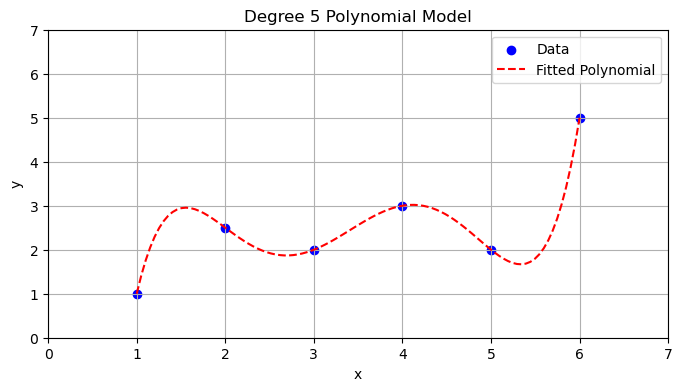

Mean Squared Error (MSE): 0.0000
R^2: 1.0000


In [23]:
# Polynomial Model

import numpy as np
import matplotlib.pyplot as plt


def do_my_poly(Xs,Y,degree):
    # Construct the design matrix X
    X = np.ones((len(Xs), 1))
    for d in range(1, degree+1):
        X = np.hstack((X, Xs.reshape(-1, 1)**d))              # <= add powers of x to data set

    # Compute Theta using the normal equation
    Beta = np.linalg.inv(X.T @ X) @ X.T @ Y

    # Define the polynomial function
    def poly(x_val, beta):
        return sum(b * (x_val**k) for k, b in enumerate(beta))

    # Generate predictions
    Y_hat = [poly(val, Beta) for val in Xs]

    # Mean Squared Error (MSE)
    mse = np.mean((Y - Y_hat)**2)

    # R^2
    ss_residual = np.sum((Y - Y_hat)**2)  # Sum of squared residuals
    ss_total = np.sum((Y - np.mean(Y))**2)  # Total sum of squares
    r_squared = 1 - (ss_residual / ss_total)

    # Plot the results
    plt.figure(figsize=(8, 4))
    plt.title(f"Degree {degree} Polynomial Model")
    X_plot = np.linspace(min(Xs), max(Xs), 100)
    Y_plot = [poly(val, Beta) for val in X_plot]

    plt.scatter(Xs,Y, label='Data', color='blue')
    plt.plot(X_plot, Y_plot, color='red', linestyle='--', label='Fitted Polynomial')
    # plt.scatter(Xs, Y_hat, color='orange', marker='x', label='Predictions')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim([0,7])
    plt.ylim([0,7])
    plt.legend()
    plt.grid()
    plt.show()

    # Print MSE and R-squared values
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R^2: {r_squared:.4f}")

Xs = np.array([ 1,2,3,4,5,6])         
Y = np.array([ 1,2.5,2,3,2,5])

do_my_poly(Xs,Y,degree=5)

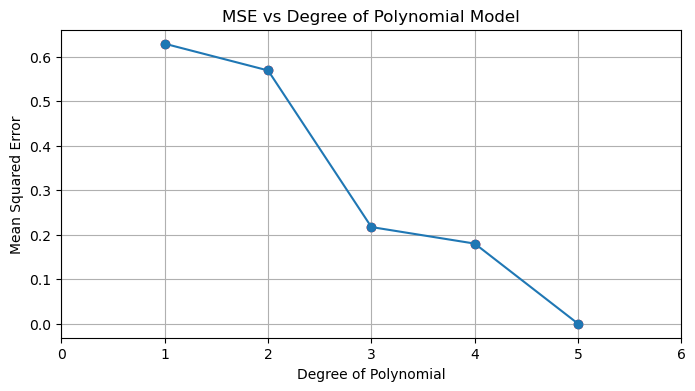

In [24]:
# Plot of mse vs degree

mses = np.array([0.6294, 0.5693, 0.2173, 0.1801, 0. ])
r2s  = np.array([0.5899, 0.629 , 0.8584, 0.8827, 1.    ])


# Generate a range of polynomial degrees corresponding to MSE values
degrees = np.arange(1,6)

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(degrees, mses, label='MSE', marker='o')
plt.scatter(degrees, mses, color='red')

# Set title and labels
plt.title('MSE vs Degree of Polynomial Model')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.xlim([0,5])
# Ensure x-axis labels are integers
plt.xticks(np.arange(0,7))

# Display grid
plt.grid(True)

# Show the plot
plt.show()

## Polynomial Regression in Sklearn

We now calculate several polynomial models for a real dataset, with annotations to explain each step. 

## 2.6 Lesson: Looking Ahead - Hyperparameters and the Model Selection Problem 
In both linear regression and multiple regression, the structure of the model is predetermined: you’re fitting either a line or a hyperplane to the data using a formula to determine the results. There are no further decisions about the model's complexity beyond selecting which features to include. This simplicity makes these models easy to interpret but limits their flexibility in capturing more complex patterns in the data.

However, in polynomial regression, the choice of model becomes more flexible because you must decide on the degree of the polynomial. This degree directly affects how well the model can fit the training data. A low degree may lead to underfitting, where the model fails to capture important patterns. In contrast, a high degree may result in overfitting, where the model captures noise instead of meaningful trends. Though the degree of the polynomial isn’t changed during training, it’s a critical choice in determining the model’s ability to generalize to new data.

Looking ahead, many machine learning models introduce **hyperparameters** that do require tuning, often during training, to optimize performance. These hyperparameters, such as the learning rate used during gradient descent, directly affect the training process and the model’s generalization ability. In upcoming lessons, we’ll explore how these hyperparameters determine essential aspects of the model and how techniques like cross-validation can help us fine-tune them for better results.

Our first glimpse of the canonical ML workflow might look like this:

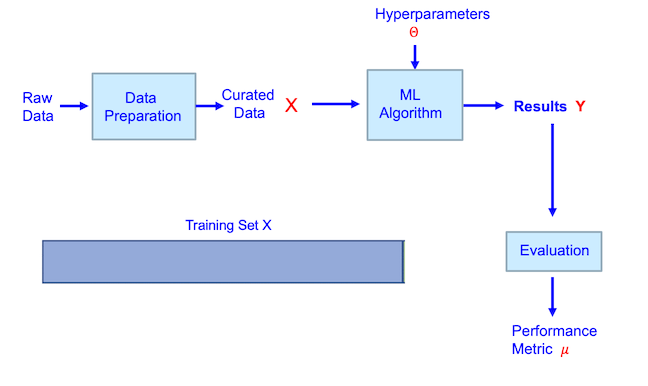

Think About It
- Why do you think some models require more decisions about complexity (e.g., polynomial degree or learning rate) compared to simpler models like linear regression?
- Why might adjusting hyperparameters (like the learning rate) during training lead to better generalization? What challenges do you think could arise in selecting the “optimal” hyperparameters?